In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.DataFrame(data.target,columns=['target'])

In [ ]:
def rmse_cv(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
RESULTADOS = {}

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
RESULTADOS['DecisionTreeRegressor']=cross_val_score(DecisionTreeRegressor(), X, y, cv=10, scoring=rmse_cv).mean()

from sklearn.linear_model import ElasticNet # We use ElasticNet even LinearResgression beacause is better than this one
RESULTADOS['ElasticNet']=cross_val_score(ElasticNet(), X, y, cv=10, scoring=rmse_cv).mean()

from sklearn.linear_model import Lasso
RESULTADOS['Lasso']=cross_val_score(Lasso(), X, y, cv=10, scoring=rmse_cv).mean()

from sklearn.linear_model import Ridge
RESULTADOS['Ridge']=cross_val_score(Ridge(), X, y, cv=10, scoring=rmse_cv).mean()

display(pd.DataFrame(RESULTADOS, index=['RMSE']).T.sort_values('RMSE', ascending=True)) # RMSE nos im porta el que  enos error haya cometido

,RMSE
Ridge,0.730728
ElasticNet,0.885273
DecisionTreeRegressor,0.886155
Lasso,0.988706


##Bagging

Los algoritmos de Bagging (Bootstrap aggregating) funcionan entrenando varios estimadores base y cambiando los datos de entrenamiento para cada uno. En sklearn los algoritmos de ensamblado de modelos se encuentran en el submódulo sklearn.ensemble. En cuanto a Bagging, sklearn tiene una versión para problemas de regresión (BaggingRegressor) y otra para problemas de clasificación (BaggingClassifier).

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
BaggingRegressor?

BaggingRegressor utiliza árboles de decisión como estimador base por defecto, sin embargo podemos utilizar uno distinto mediante el parámetro base_estimator.

In [ ]:
estimador_bagging_10 = BaggingRegressor(n_estimators=10)
error_cv = cross_val_score(estimador_bagging_10, X, y,
                scoring=rmse_cv, cv=10).mean()

RESULTADOS["bagging_arbol_10"] = error_cv
error_cv

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

np.float64(0.6592299353453781)

In [ ]:
RESULTADOS['Bagging_tree_100']= cross_val_score(BaggingRegressor(n_estimators=100), X, y, cv=10, scoring=rmse_cv).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [ ]:
display(pd.DataFrame(RESULTADOS, index=['RMSE']).T.sort_values('RMSE', ascending=True))

,RMSE
Bagging_tree_100,0.634939
bagging_arbol_10,0.659230
Ridge,0.730728
ElasticNet,0.885273
DecisionTreeRegressor,0.886155
Lasso,0.988706


In [ ]:
RESULTADOS['Bagging_ElasticNet_100']= cross_val_score(BaggingRegressor(n_estimators=100, estimator=ElasticNet()), X, y, cv=10, scoring=rmse_cv).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [ ]:
display(pd.DataFrame(RESULTADOS, index=['RMSE']).T.sort_values('RMSE', ascending=True))

,RMSE
Bagging_tree_100,0.634939
bagging_arbol_10,0.659230
Ridge,0.730728
Bagging_ElasticNet_100,0.885047
ElasticNet,0.885273
DecisionTreeRegressor,0.886155
Lasso,0.988706


En su momento vimos que existe un tipo de arbol de decision completamente aleatorio (Extremely Randomized Trees) que deciden la particion en cada nodo al azar. Vemos que al agrupar muchos de estos estimadores que son débiles (aunque mejores que tirar una moneda al azar, ya que un árbol de decision aleatorio aún así aprende a separar los elementos), la varianza general se reduce ya que la que aporta un arbol se complementa con la del de al lado.

In [ ]:
from sklearn.tree import ExtraTreeRegressor
RESULTADOS['Extratree_100']= cross_val_score(BaggingRegressor(n_estimators=100, estimator = ExtraTreeRegressor()), X, y, cv=10, scoring=rmse_cv).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [ ]:
display(pd.DataFrame(RESULTADOS, index=['RMSE']).T.sort_values('RMSE', ascending=True))

,RMSE
Extratree_100,0.615365
Bagging_tree_100,0.634939
bagging_arbol_10,0.659230
Ridge,0.730728
Bagging_ElasticNet_100,0.885047
ElasticNet,0.885273
DecisionTreeRegressor,0.886155
Lasso,0.988706


##Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

AdaBoostRegressor?

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
RESULTADOS['AdaBoost_100']= cross_val_score(AdaBoostRegressor(n_estimators=100), X, y, cv=10, scoring=rmse_cv).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## Gradient Boosting (GBRT)
Otro algoritmo de Boosting es Gradient Boosting que a cada iteración usa el algoritmo de Descenso de Gradiente para cada iteración y así entrenar un estimador nuevo que minimiza la función de error (loss function) del modelo.

Scikit-learn implementa el algoritmo de (Gradient Boosted Regression Trees), que usa árboles de decisión como estimadores base, en GradientBoostingRegressor y GradientBoostingClassifier

Gradient Boosting puede usar cualquier funcion de error siempre que sea diferenciable.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GradientBoostingRegressor?

In [ ]:
RESULTADOS['GradientBoosting_100']= cross_val_score(GradientBoostingRegressor(n_estimators=100), X, y, cv=10, scoring=rmse_cv).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

In [ ]:
# from sklearn.svm import SVR
# cross_val_score(SVR(), X, y, cv=10, scoring=rmse_cv).mean()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
importances = GradientBoostingRegressor(n_estimators=100, loss='squared_error').fit(X_train,y_train).feature_importances_

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
importances_df=pd.DataFrame({'Variables':data.feature_names, 'importance':importances}, columns=['Variables','importance']).sort_values('importance', ascending=True)

<BarContainer object of 8 artists>

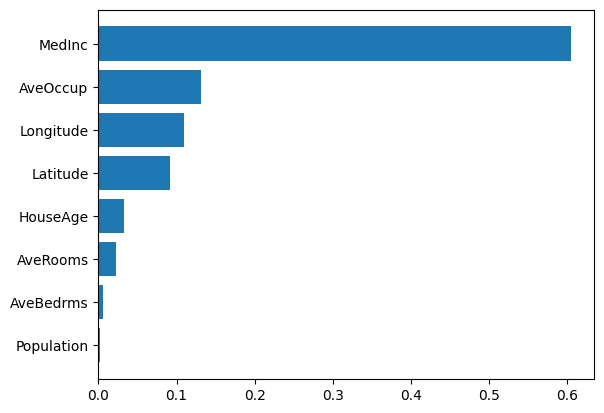

In [ ]:
plt.barh(importances_df['Variables'], importances_df['importance'])

## RandomForest

El algoritmo de Bosques Aleatorios funciona mediante la creación de árboles de decision entrenados en un subgrupo aleatorio de variables.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


RESULTADOS['RandomForest_100']=cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=10, scoring=rmse_cv).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

##XGBoost
XGBoost (eXtreme Gradient Boosting) es un algoritmo de boosting relativamente nuevo que tiene bastante acogida. Es una implementación de Gradient Boosted Trees pero enfocado a datasets grandes.

Al ser muy nuevo (el proyecto se creó en 2014 y el paper se publicó en 2016, éste es el paper) no está implementado en scikit-learn. Sin embargo existe en el paquete xgboost, que proporciona estimadores con base en dicho algoritmo que son compatibles con sklearn.

Podemos instalar xgboost de conda-forge

In [ ]:
from xgboost import XGBRegressor

RESULTADOS['XGBoost_100']= cross_val_score(XGBRegressor(n_estimators=100), X, y, cv=10, scoring=rmse_cv).mean()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

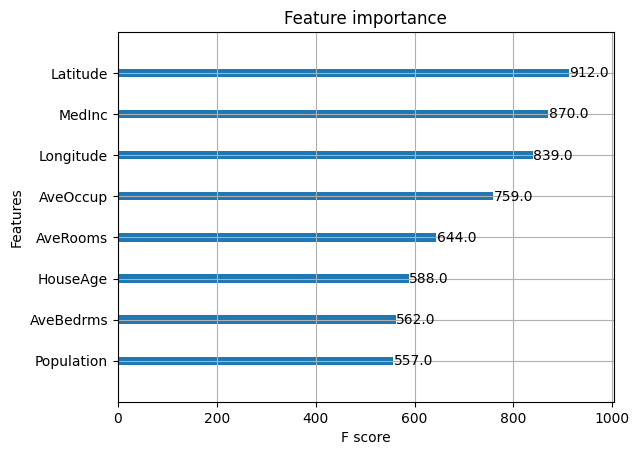

In [ ]:
from xgboost import plot_importance
plot_importance(XGBRegressor(n_estimators=100).fit(X,y))

## Stacking
El algoritmo de stacking simplemente usa el output (generalmente en terminos de probabilidades para casos de clasificacion o de las predicciones en casos de regresión) de múltiples modelos como input para un nuevo metamodelo.

scikit learn no tiene un estimador de stacking por defecto, sin embargo, podemos usar el estimador de stacking (StackingRegressor) de mlxtend, una librería que amplia las funcionalidades de sklearn

Podemos instalar mlxtend asi:

In [ ]:

from sklearn.ensemble import StackingRegressor
StackingRegressor?

Por ejemplo, podemos usar los estimadores ensamblados que hemos creado en este notebook para crear un nuevo estimador. Dicho estimador no tiene garantizado un funcionamiento mejor que el mejor de los estimadores que usa como input.

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# Assuming X and y are already loaded as pandas DataFrames
# Convert y to a 1D numpy array
y_array = y.values.ravel() # Use ravel() to ensure it's a 1D array

estimador_stacking = StackingRegressor(
    estimators=[
        ('bagR',BaggingRegressor(n_estimators=100)),
        ('ada',AdaBoostRegressor(n_estimators=100)),
        ('GB',GradientBoostingRegressor(n_estimators=100)),
        ('RF',RandomForestRegressor(n_estimators=100))],
    final_estimator=XGBRegressor(n_estimators=100))

# Use y_array for cross_val_score
# Assuming rmse_cv is defined elsewhere and works with 1D arrays
error_cv = cross_val_score(estimador_stacking, X, y, scoring=rmse_cv, cv=10).mean()

RESULTADOS["stacking"] = error_cv

error_cv

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

np.float64(0.6984475712671796)

In [ ]:
#Save model
import pickle
filename = 'model_stacking_30min.sav'
pickle.dump(estimador_stacking, open(filename, 'wb'))

In [ ]:
#Read model
import pickle
filename = 'model_stacking_30min.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
display(pd.DataFrame(RESULTADOS, index=['RMSE']).T.sort_values('RMSE', ascending=True))

,RMSE
Extratree_100,0.615365
XGBoost_100,0.617230
GradientBoosting_100,0.628298
RandomForest_100,0.634602
Bagging_tree_100,0.634939
bagging_arbol_10,0.659230
stacking,0.698448
Ridge,0.730728
Bagging_ElasticNet_100,0.885047
ElasticNet,0.885273
